In [1]:
import astroARIADNE
from astroARIADNE.star import Star
from astroARIADNE.fitter import Fitter
from astroARIADNE.plotter import SEDPlotter

###################################################################
## The lines below will need to be changed on a per-target basis ##
###################################################################
starname = 'TOI-1685'
ra = 68.593953
dec = 43.03704
gaia_id = 252366608956186240

#leave all priors as default except for av
av=0
av_unc=0.0

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.
/Users/jenburt/anaconda3/lib/python3.10/site-packages/astroARIADNE/fitter.py:43: UserWarning: (py)MultiNest installation (or libmultinest.dylib) not detected.
  warnings.warn(



		#####################################
		##             ARIADNE             ##
		#####################################
   spectrAl eneRgy dIstribution bAyesian moDel averagiNg fittEr

			Author : Jose Vines
			Contact : jose . vines at ug . uchile . cl
			Star : TOI-1685
		*** LOOKING UP ARCHIVAL INFORMATION ***
INFO: Query finished. [astroquery.utils.tap.core]
Warning!: CatalogWarning
Warning message: Parameter radius not found! Be advised.
Warning!: CatalogWarning
Warning message: Parameter lum not found! Be advised.
INFO: Query finished. [astroquery.utils.tap.core]
Star not found in catalog TYCHO2.
INFO: Query finished. [astroquery.utils.tap.core]
Star not found in catalog Pan-STARRS.
INFO: Query finished. [astroquery.utils.tap.core]
Star not found in catalog SDSS.
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Looking online for archival magnitudes for star TOI-1685
Checking cat

21294it [00:52, 403.97it/s, +500 | bound: 284 | nc: 1 | ncall: 701331 | eff(%):  3.110 | loglstar:   -inf < 15.671 <    inf | logz: -23.139 +/-    nan | dlogz:  0.000 >  0.010]     


			Estimated log g : 4.811 +/- 0.046
Creation of the directory TOI-1685_SED_v3/ failed. It might already exist

		*** EXECUTING MAIN FITTING ROUTINE ***
			Selected engine : Bayesian Model Averaging
			Live points : 500
			log Evidence tolerance : 0.5
			Free parameters : 13
			Bounding : multi
			Sampling : rwalk
			N threads : 4

			FITTING MODEL : phoenix


14421it [01:43, 138.88it/s, +500 | bound: 176 | nc: 1 | ncall: 335347 | eff(%):  4.456 | loglstar:   -inf < 199.139 <    inf | logz: 170.825 +/-    nan | dlogz:  0.001 >  0.500]   


			FITTING MODEL : btsettl


15230it [01:51, 136.57it/s, +500 | bound: 180 | nc: 1 | ncall: 355427 | eff(%):  4.432 | loglstar:   -inf < 201.551 <    inf | logz: 171.612 +/-    nan | dlogz:  0.001 >  0.500]   


		*** AVERAGING POSTERIOR SAMPLES ***


100%|██████████| 18/18 [00:00<00:00, 64.22it/s]


		*** ESTIMATING AGE AND MASS USING MIST ISOCHRONES ***


22217it [00:55, 402.61it/s, +500 | bound: 297 | nc: 1 | ncall: 733242 | eff(%):  3.100 | loglstar:   -inf < 12.430 <    inf | logz: -28.779 +/-    nan | dlogz:  0.000 >  0.010]     



			Fitting finished.
			Best fit parameters are:
			teff : 3431.0050 + 82.8299 - 42.2432 [3334.9224, 3581.7554]
			logg : 4.8267 + 0.0425 - 0.0388 [4.6795, 4.9496]
			[Fe/H] : 0.2603 + 0.1588 - 0.1918 [-0.0986, 0.5161]
			dist : 37.6193 + 0.0256 - 0.0156 [37.5964, 37.7101]
			rad : 0.4838 + 0.0173 - 0.0185 [0.4434, 0.5298]
			Av : 0.0000 fixed
			Angular Diameter : 0.1196 + 0.0043 - 0.0046 [0.1096, 0.1308]
			Grav mass : 0.5718 + 0.0721 - 0.0651 [0.3999, 0.8143]
			Luminosity : 0.0295 + 0.0034 - 0.0026 [0.0232, 0.0379]
			Iso mass : 0.4852 + 0.0133 - 0.0120 [0.3404, 0.5332]
			Age (Gyr) : 4.4907 + 8.5032 - 3.9591 [0.0817, 13.4888]
			EEP : 315.9791 + 8.4007 - 43.5785 [168.9672, 325.9549]
			Excess BP noise : 0.0362 + 0.0218 - 0.0144 [0.0046, 0.1096]
			Excess G noise : 0.0184 + 0.0173 - 0.0129 [0.0002, 0.0881]
			Excess RP noise : 0.0472 + 0.0270 - 0.0196 [0.0051, 0.1269]
			Excess J noise : 0.0625 + 0.1573 - 0.0524 [0.0005, 0.7132]
			Excess H noise : 0.0929 + 0.1662 - 0.0696 [0.0008

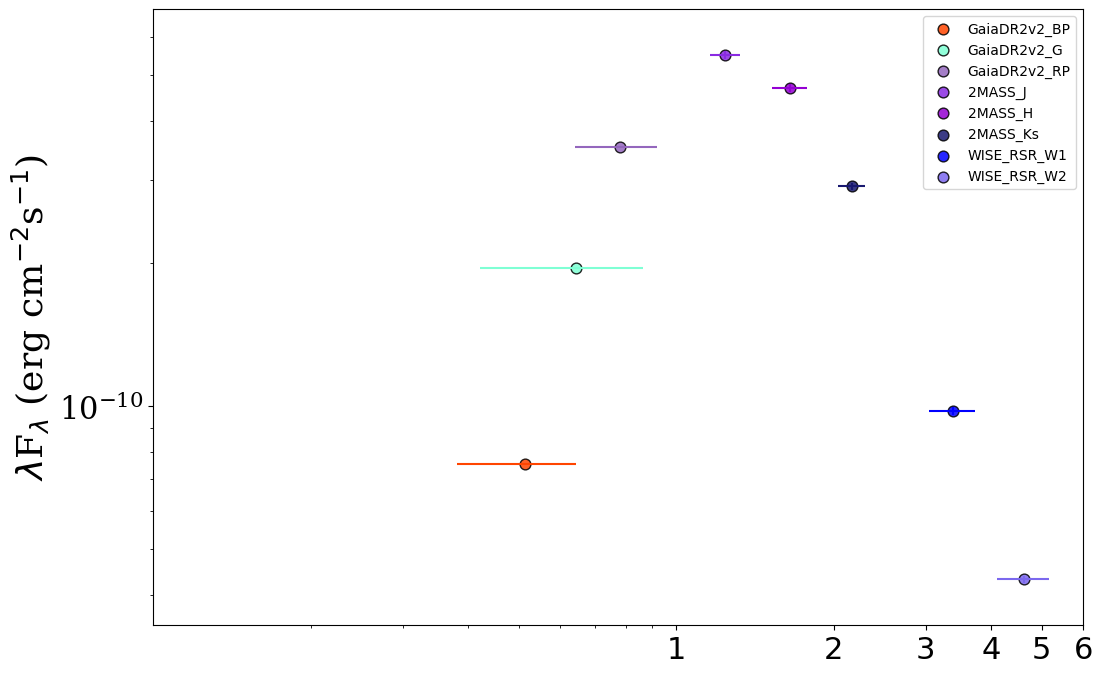

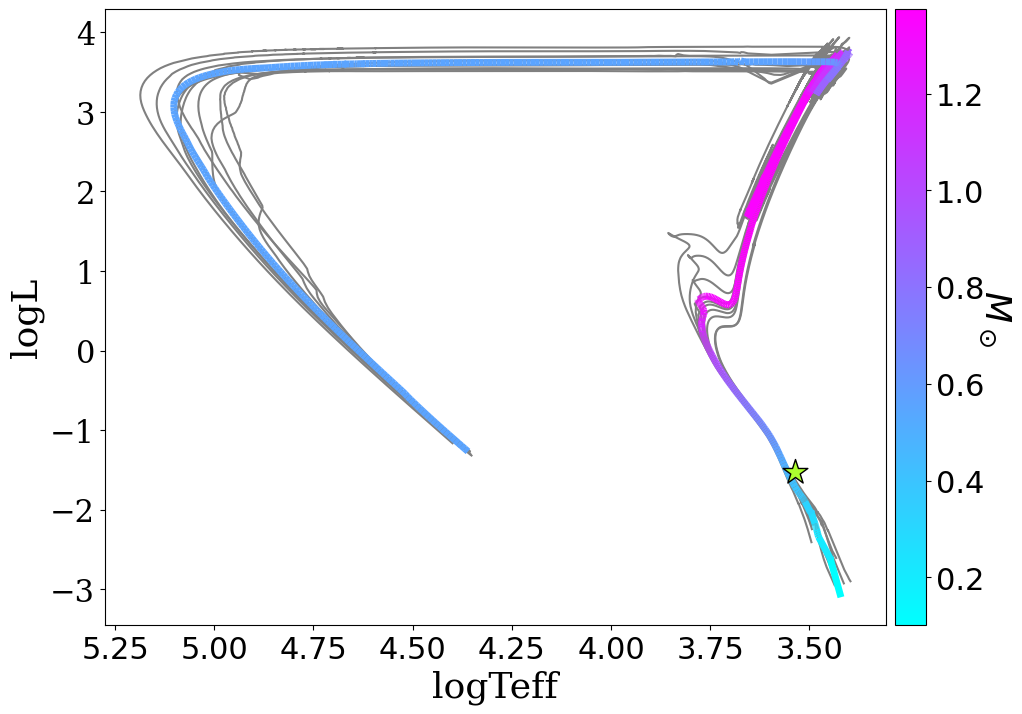

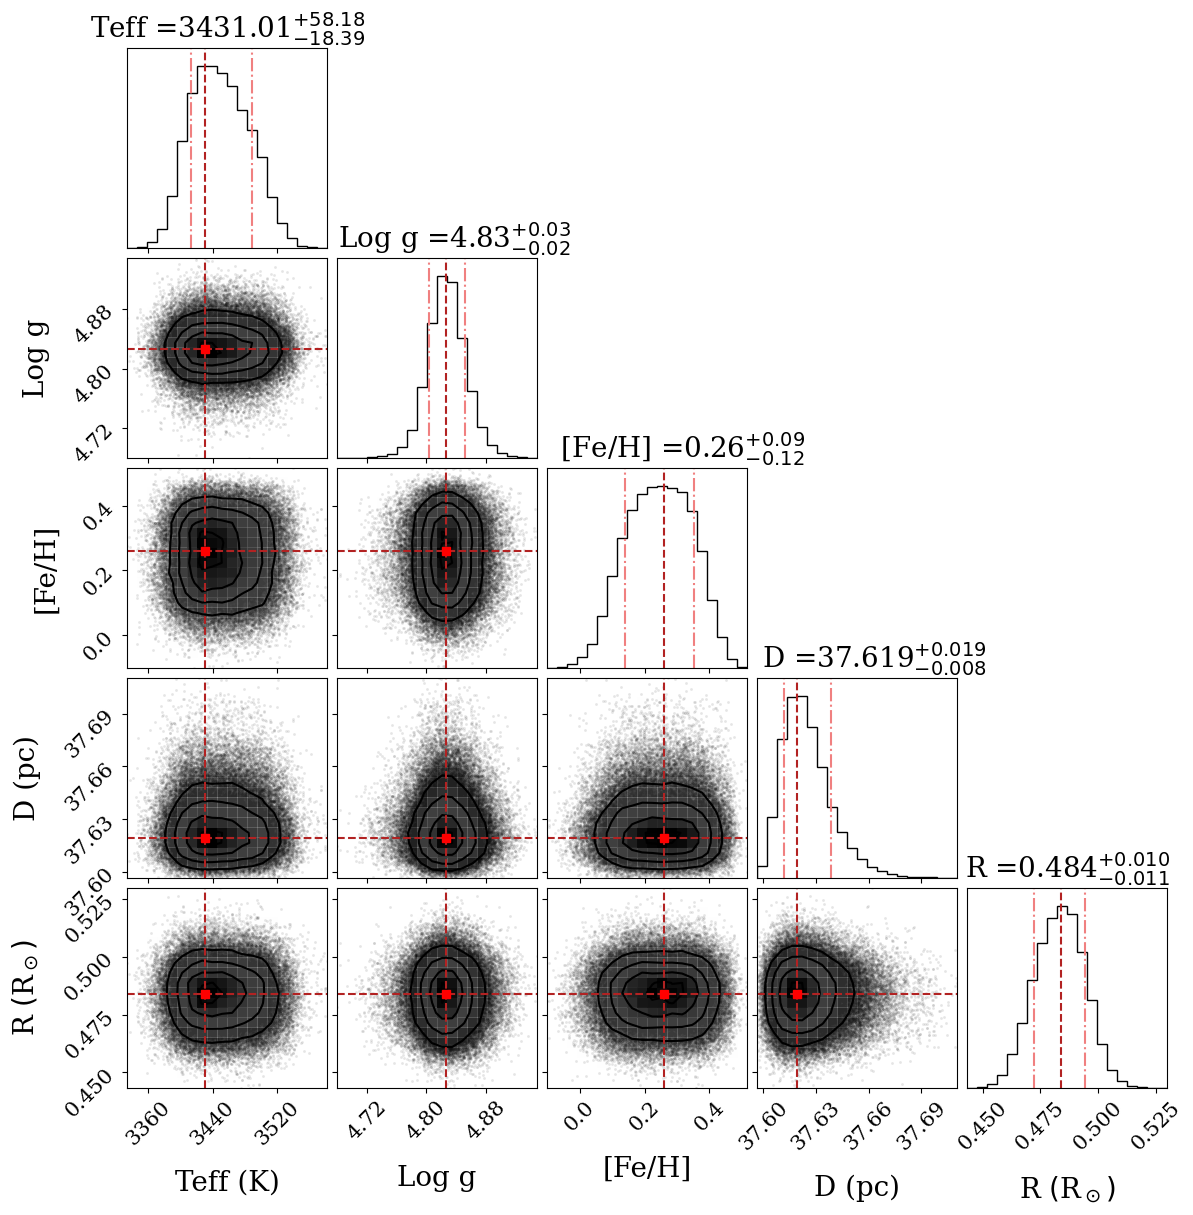

In [3]:

###############################################################
##         From here on, everything should be static         ##
###############################################################

out_folder=starname+'_SED_v3/'
in_file = out_folder + 'BMA.pkl'
plots_out_folder=out_folder+'plots/'

s = Star(starname, ra, dec, g_id=gaia_id)

#add 2MASS JK bands and WISE photometry
#s.add_mag(4.667, .26, '2MASS_J') #mag, uncertainty, filter name
#s.add_mag(4.186, 0.292, '2MASS_K')
#s.add_mag(3.988, 0.234, 'WISE_RSR_W1') #1st and 2nd WISE bands
#s.add_mag(3.642, 0.173, 'WISE_RSR_W2')

s.remove_mag('TESS')
s.remove_mag('SDSS_r')
s.remove_mag('SDSS_i')

s.estimate_logg()

engine = 'dynesty'
nlive = 500
dlogz = 0.5
bound = 'multi'
sample = 'rwalk'
threads = 4
dynamic = False

setup = [engine, nlive, dlogz, bound, sample, threads, dynamic]

# Feel free to uncomment any unneeded/unwanted models
models = ['phoenix','btsettl']#,'btnextgen','btcond','kurucz','ck04']

f = Fitter()
f.star = s
f.setup = setup
f.av_law = 'fitzpatrick'
f.out_folder = out_folder
f.bma = True
f.models = models
f.n_samples = 100000

f.prior_setup = {'teff': ('default'),'logg': ('default'),'z': ('default'),'dist': ('default'),'rad': ('default'),'Av': ('fixed', 0, 0)}

f.initialize()
f.fit_bma()

artist = SEDPlotter(in_file, plots_out_folder)

artist.plot_SED_no_model()
artist.plot_bma_hist()
artist.plot_bma_HR(10)
artist.plot_corner()
#artist.plot_SED()